In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("data.csv")
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
categorical_features = data.select_dtypes(include=[object])
categorical_features.head()

,date,street,city,statezip,country
0,2014-05-02 00:00:00,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
from sklearn.preprocessing import LabelEncoder

In [7]:
# # labelEncoder used to convert categorical data or text data into numerical to apply any ML algorithm
le = LabelEncoder()

# # After importing labelEncoder than fit and transform the text data columns
categorical_features_en = categorical_features.apply(le.fit_transform)

# # use df.apply() to apply le.fit_transform to all columns
categorical_features_en.head()

,date,street,city,statezip,country
0,0,1522,36,62,0
1,0,3899,35,58,0
2,0,2291,18,26,0
3,0,4263,3,7,0
4,0,4352,31,31,0


In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
# done after label encoding
ohe = OneHotEncoder()

categorical_features_ohe = ohe.fit_transform(categorical_features_en).toarray()
categorical_features_ohe

array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [30]:
converted = pd.DataFrame(categorical_features_ohe)
type(converted)

pandas.core.frame.DataFrame

In [35]:
df = pd.read_csv('data.csv')
df.head()
numerical = df.select_dtypes(exclude=[object])
numerical.head()
new_dataframe = numerical.join(converted)
new_dataframe.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,4707,4708,4709,4710,4711,4712,4713,4714,4715,4716
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
# corr = corr = data.corr()
# plt.figure(figsize=(15,8))
# heatmap = sns.heatmap(corr, annot=True)

In [37]:
# data.drop(['date','country'],1,inplace=True)
# data.drop(['street'],1,inplace=True)
# data.drop(['city'],1,inplace=True)

In [38]:
X = new_dataframe.drop(['price'],1)
y = new_dataframe.price

In [39]:
from sklearn.model_selection import train_test_split as tts

In [40]:
X_train, X_test, y_train, y_test = tts(X, y, random_state=2, test_size = 0.2)

In [41]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
train_data = model.fit(X_train,y_train)
train_data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
accuracy = model.score(X_test, y_test)
accuracy

-0.35044150862842827

In [45]:
y_pred = model.predict(X_test)
y_pred

array([ 2.27255170e+05, -5.62662300e+04,  7.28934325e+05,  1.35798297e+05,
        3.58572187e+05,  3.05900058e+05,  1.39456889e+06,  5.41017466e+05,
        7.58006446e+05, -1.10507362e+05,  4.64289003e+05,  1.54234930e+05,
       -1.35329567e+05,  3.34745853e+05,  3.65732109e+05,  6.05469465e+04,
        5.08371229e+05,  3.30920042e+05,  2.66576804e+05, -1.04349739e+05,
        3.93970585e+05,  2.71235983e+05,  7.28593791e+05, -7.40784712e+03,
        1.32099665e+05,  1.03559037e+06, -1.65461366e+05, -2.99767955e+04,
        2.76956240e+05,  5.84792119e+05,  1.97491113e+05,  3.37121817e+05,
        7.80663849e+05,  1.10929160e+06,  9.56918056e+05, -5.44838767e+04,
        7.72928643e+05, -1.64588652e+05,  7.60001232e+05,  7.00880753e+05,
        1.31994103e+05,  6.22899782e+05, -8.44709744e+04,  1.04738625e+06,
        5.32916085e+05,  1.29930353e+06,  3.03084417e+05,  6.36254117e+05,
        2.43549973e+05,  6.87986563e+04,  1.38595168e+05,  9.04464541e+05,
        5.68784510e+05,  

In [46]:
model.intercept_

1578012.6515205707

In [47]:
model.coef_

array([-6.81678514e+04,  2.18687330e+04,  4.62550949e+01, ...,
       -8.07051619e+04,  3.12182586e+04,  0.00000000e+00])

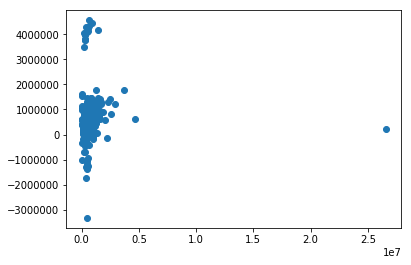

In [48]:
plt.scatter(y_test,y_pred)